# Real Estate Data Collection and Cleaning Project

Collects the data from two real estate websites in Oman:
- [Bayut Oman](https://www.bayut.om/en/)
- [OpenSooq Oman](https://om.opensooq.com/en/property)

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [38]:
# Load both CSV files
df1 = pd.read_csv("cleaned_bayut.csv")
df2 = pd.read_csv("cleaned_opensooq.csv")

# Optional: standardize column names (prevents mismatch)
df1.columns = df1.columns.str.strip().str.lower()
df2.columns = df2.columns.str.strip().str.lower()

# Concatenate the two DataFrames
df_combined = pd.concat([df1, df2], ignore_index=True)

# Show result
df_combined.head()

,title,price,location,rooms,size,listing_type
0,Villa,1200,"Al Buraimi, Al Buraimi",5.0,1.0,NaN
1,Villa,1500,"Qantab, Muscat",5.0,1.0,NaN
2,Apartment,1200,"Mahut, Al Wusta",3.0,1.0,NaN
3,Villa,1500,"Al Sifah, Muscat",5.0,1.0,NaN
4,Villa,1000,"Hamra, Al Dakhiliya",4.0,1.0,NaN


In [40]:
df_combined = df_combined.drop(columns=['listing_type'])

In [41]:
df_combined.head()

,title,price,location,rooms,size
0,Villa,1200,"Al Buraimi, Al Buraimi",5.0,1.0
1,Villa,1500,"Qantab, Muscat",5.0,1.0
2,Apartment,1200,"Mahut, Al Wusta",3.0,1.0
3,Villa,1500,"Al Sifah, Muscat",5.0,1.0
4,Villa,1000,"Hamra, Al Dakhiliya",4.0,1.0


In [42]:
df_combined.shape

(10098, 5)

In [43]:
df_combined.to_csv('real_estate_project.csv', index=False)

### Feature Engineering

In [48]:
# remove non-numeric characters (like currency or commas)
df_combined['price'] = df_combined['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)

# Convert to numeric
df_combined['price'] = pd.to_numeric(df_combined['price'], errors='coerce')

df_combined['price_per_sqm'] = df_combined['price'] / df_combined['size']

In [50]:
df_combined[["price", "price_per_sqm"]].head()

,price,price_per_sqm
0,1200.0,1200.0
1,1500.0,1500.0
2,1200.0,1200.0
3,1500.0,1500.0
4,1000.0,1000.0


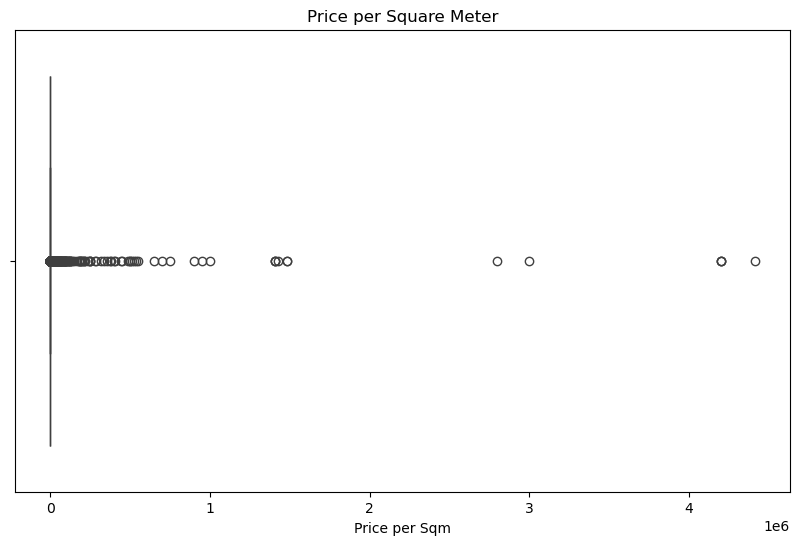

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined["price_per_sqm"])
plt.title("Price per Square Meter")
plt.xlabel("Price per Sqm")
plt.show()

In [55]:
# Remove the outliers:
Q1 = df_combined['price_per_sqm'].quantile(0.25)
Q3 = df_combined['price_per_sqm'].quantile(0.75)

IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only rows within bounds (remove outliers)
df_combined = df_combined[
    (df_combined['price_per_sqm'] >= lower_bound) &
    (df_combined['price_per_sqm'] <= upper_bound)
]


In [57]:
print("Remaining rows:", df_combined.shape[0])

Remaining rows: 9225


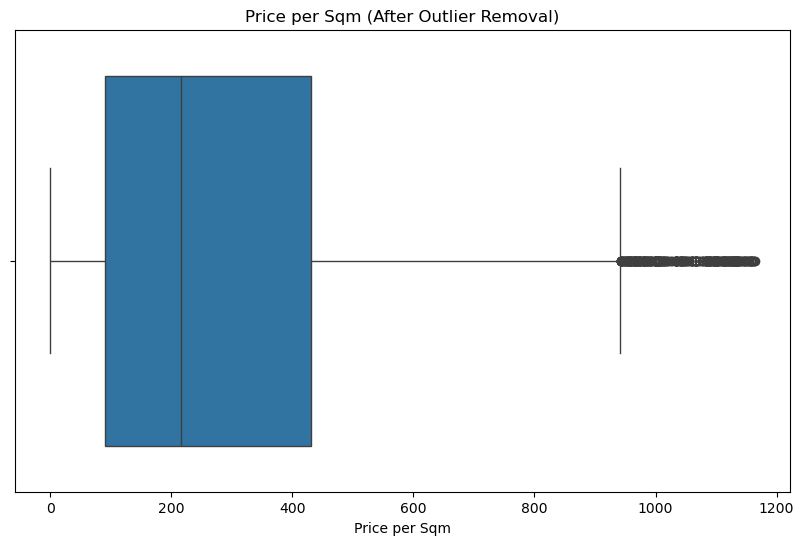

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined['price_per_sqm'])
plt.title("Price per Sqm (After Outlier Removal)")
plt.xlabel("Price per Sqm")
plt.show()

### Feature Scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# numeric columns to scale
numeric_cols = ['price', 'rooms', 'size', 'price_per_sqm']

# MinMax scaling (0 to 1)
df_combined_minmax = df_combined.copy()
df_combined_minmax[numeric_cols] = minmax_scaler.fit_transform(df_combined_minmax[numeric_cols])

print("MinMax Scaled Data:")
print(df_combined_minmax[numeric_cols].head())

MinMax Scaled Data:
       price     rooms          size  price_per_sqm
4   0.000096  0.272727  0.000000e+00       0.859296
5   0.011996  0.181818  5.075708e-08       0.937414
6   0.009996  0.090909  4.610047e-08       0.859296
9   0.002196  0.090909  5.168840e-08       0.168790
11  0.038996  0.181818  2.188608e-07       0.711519


In [63]:
# Standard scaling (mean = 0, std = 1)
df_combined_standard = df_combined.copy()
df_combined_standard[numeric_cols] = standard_scaler.fit_transform(df_combined_standard[numeric_cols])

print("\nStandard Scaled Data:")
print(df_combined_standard[numeric_cols].head())


Standard Scaled Data:
       price     rooms      size  price_per_sqm
4  -0.296791  0.486392 -0.014492       2.560660
5   0.284056 -0.039294 -0.014487       2.894196
6   0.186435 -0.564980 -0.014488       2.560660
9  -0.194289 -0.564980 -0.014487      -0.387558
11  1.601945 -0.039294 -0.014472       1.929704
